<a href="https://colab.research.google.com/github/Pullsu/Uczenie-maszynowe-w-finansach/blob/Use-Case-1/Use_Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# 1. Wczytanie danych

In [2]:
dane = pd.read_csv("/content/case1.csv", sep = ";" , encoding ='utf-8')
dane.head(10)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,7.0,None,XENON
8,8,9,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,0.00,0.00,496.62,1,1,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9,9,10,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,2570.59,3336.01,30572.70,8,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO


# 2. Preprocessing

## 2.1 Podstawowe informacje o danych

In [3]:
# Rozmiar ramki danych
dane.shape

(9841, 51)

In [4]:
# Informacje o zmiennych
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [5]:
# Obliczenie podstawowych statystyk
dane.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [6]:
for i in dane.columns:
  print(dane[i].value_counts())
  print('*'*50)

0       1
6564    1
6557    1
6558    1
6559    1
       ..
3281    1
3282    1
3283    1
3284    1
9840    1
Name: Unnamed: 0, Length: 9841, dtype: int64
**************************************************
1       3
1458    3
1452    3
1453    3
1454    3
       ..
3527    1
3526    1
3525    1
3524    1
4729    1
Name: Index, Length: 4729, dtype: int64
**************************************************
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: Address, Length: 9816, dtype: int64
***********************

* ### Na podstawie analizy wyniku powyższego kodu postanowiłem usunąć następujące kolumny:

1. Unnamed: 0
2. Index
3. Address
4. ERC20 avg time between sent tnx
5. ERC20 avg time between rec tnx
6. ERC20 avg time between rec 2 tnx
7. ERC20 avg time between contract tnx
8. ERC20 avg val sent contract
9. ERC20 max val sent contract
10. ERC20 min val sent contract

* ### Kolumny Unnamed: 0, Index oraz Address są nieprzydatne z punktu widzenia badania, ponieważ są to indeksy poszczególnych wierszy

* ### Kolumny od pkt 4. do 10. zawierają tylko wartości zerowe, przez co nie wnoszą żadnych informacji



In [7]:
# Usunięcie niepotrzebnych kolumn:

dane2 = dane.drop(["Unnamed: 0", "Index", "Address", "ERC20 avg time between sent tnx",
                  "ERC20 avg time between rec tnx", "ERC20 avg time between rec 2 tnx",
                  "ERC20 avg time between contract tnx", "ERC20 avg val sent contract",
                  "ERC20 max val sent contract","ERC20 min val sent contract"], axis=1)
dane2.shape

(9841, 41)

## 2.2 Obróbka zmiennych kategorycznych

### W zbiorze danych są dwie zmienne kategoryczne:
1. ERC20 most sent token type

2. ERC20_most_rec_token_type

Należy sprawdzić kategorie zmiennych (ich liczebności):

In [8]:
kategorie = dane2["ERC20 most sent token type"].value_counts()
kategorie2 = dane2["ERC20_most_rec_token_type"].value_counts()

In [9]:
kategorie

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: ERC20 most sent token type, Length: 305, dtype: int64

In [10]:
kategorie2

0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: ERC20_most_rec_token_type, Length: 467, dtype: int64

In [11]:
print("Zmienna ERC20 most sent token type posiada:",len(kategorie), "kategorii")

Zmienna ERC20 most sent token type posiada: 305 kategorii


In [12]:
print("Zmienna ERC20_most_rec_token_type posiada:",len(kategorie2), "kategorii")

Zmienna ERC20_most_rec_token_type posiada: 467 kategorii


#### Jak widać, mamy do czynienia z bardzo dużą liczbą kategorii zmiennych. Aby uniknąć przekleństwa wymiarowości zastosujemy One-Hot Encoding, ale tylko dla 10 najpopularniejszych kategorii.

#### Najpierw jednak, wszystkie braki danych, spacje oraz zera zamienimy na etykietę "None".

In [13]:
dane2["ERC20 most sent token type"].fillna(value="None", inplace=True)
dane2['ERC20 most sent token type'].replace(' ', "None", inplace=True)
dane2['ERC20 most sent token type'].replace("0", "None", inplace=True)

In [14]:
dane2["ERC20 most sent token type"].value_counts()

None                                                      8287
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
blockwell.ai KYC Casper Token                              128
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: ERC20 most sent token type, Length: 303, dtype: int64

In [16]:
dane2["ERC20_most_rec_token_type"].fillna(value="None", inplace=True)
dane2['ERC20_most_rec_token_type'].replace(' ', "None", inplace=True)
dane2['ERC20_most_rec_token_type'].replace("0", "None", inplace=True)

In [15]:
dane2["ERC20_most_rec_token_type"].value_counts()

0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: ERC20_most_rec_token_type, Length: 467, dtype: int64

### One-Hot Encoding dla najpopularniejszych kategorii:

In [17]:
one_hot_encoded = pd.get_dummies(dane2['ERC20 most sent token type'])

In [18]:
# Najpopularniejsze kategorie
pop_kategorie = dane2['ERC20 most sent token type'].value_counts().nlargest(10).index

In [19]:
# Ograniczenie zbioru
one_hot_encoded = one_hot_encoded[pop_kategorie]

In [20]:
# Dołączenie nowych kolumn do głównej ramki danych
dane2_encoded = pd.concat([dane2, one_hot_encoded], axis=1)

In [23]:
# Usunięcie pierwotnej kolumny "ERC20 most sent token type"
dane2_encoded.drop(columns=['ERC20 most sent token type'], inplace=True)

### Identyczne kroki przeprowadzamy dla drugiej zmiennej: "ERC20_most_rec_token_type"

In [21]:
one_hot_encoded2 = pd.get_dummies(dane2_encoded['ERC20_most_rec_token_type'])
pop_kategorie2 = dane2_encoded['ERC20_most_rec_token_type'].value_counts().nlargest(10).index
one_hot_encoded2 = one_hot_encoded2[pop_kategorie2]
dane2_encoded = pd.concat([dane2_encoded, one_hot_encoded2], axis=1)
dane2_encoded.drop(columns=['ERC20_most_rec_token_type'], inplace=True)

In [24]:
# 59 = 41 + 20 - 2
dane2_encoded.shape

(9841, 59)

## 2.3 Usunięcie braków danych

In [25]:
total_missing_values = dane2_encoded.isna().sum()
print( total_missing_values)

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

### Jak widzimy, usuniętych zostanie tylko 829 wierszy

In [26]:
dane2_cleaned = dane2_encoded.dropna()
dane2_cleaned.shape

(9012, 59)

## 2.4 Zmienne typu int przekształcone na zmienne typu float

In [ ]:
dane2_cleaned['Sent tnx'] = pd.to_numeric(dane2_cleaned['Sent tnx'], downcast='float')
dane2_cleaned['Received Tnx'] = pd.to_numeric(dane2_cleaned['Received Tnx'], downcast='float')
dane2_cleaned['Number of Created Contracts'] = pd.to_numeric(dane2_cleaned['Number of Created Contracts'], downcast='float')
dane2_cleaned['Unique Received From Addresses'] = pd.to_numeric(dane2_cleaned['Unique Received From Addresses'], downcast='float')
dane2_cleaned['Unique Sent To Addresses'] = pd.to_numeric(dane2_cleaned['Unique Sent To Addresses'], downcast='float')
dane2_cleaned['total transactions (including tnx to create contract'] = pd.to_numeric(dane2_cleaned['total transactions (including tnx to create contract'], downcast='float')

In [28]:
dane2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9012 entries, 0 to 9840
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9012 non-null   int64  
 1   Avg min between sent tnx                              9012 non-null   float64
 2   Avg min between received tnx                          9012 non-null   float64
 3   Time Diff between first and last (Mins)               9012 non-null   float64
 4   Sent tnx                                              9012 non-null   float32
 5   Received Tnx                                          9012 non-null   float32
 6   Number of Created Contracts                           9012 non-null   float32
 7   Unique Received From Addresses                        9012 non-null   float32
 8   Unique Sent To Addresses                              9012

## 2.5 Usunięcie wartości odstających w kolumnach ze zmiennymi numerycznymi

In [32]:
# Lista 38 zmiennych numerycznych
column_names = dane2_cleaned.columns.tolist()
columns_numeric = [column_names[i] for i in range(1, 38)]
columns_numeric

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 'total ether sent contracts',
 'total ether balance',
 'Total ERC20 tnxs',
 'ERC20 total Ether received',
 'ERC20 total ether sent',
 'ERC20 total Ether sent contract',
 'ERC20 uniq sent addr',
 'ERC20 uniq rec addr',
 'ERC20 uniq sent addr.1',
 'ERC20 uniq rec contract addr',
 'ERC20 min val rec',
 'ERC20 max val rec',
 'ERC20 avg val rec',
 'ERC20 min val sent',
 'ERC20 max val sent',
 'ERC20 avg val sent',
 'ERC20 uniq sent token name']

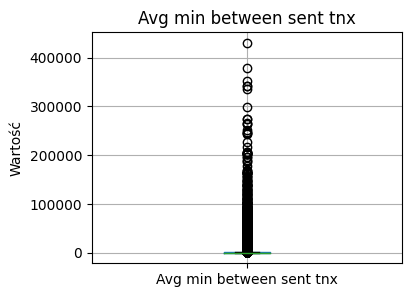

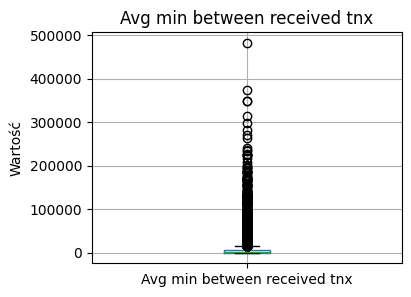

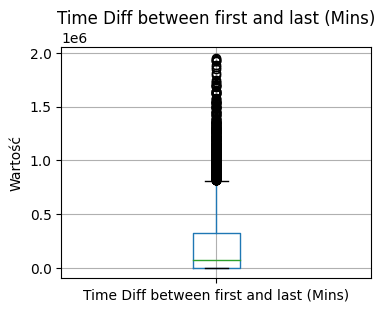

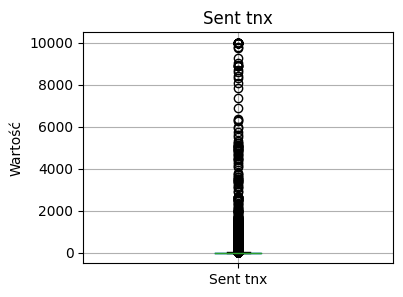

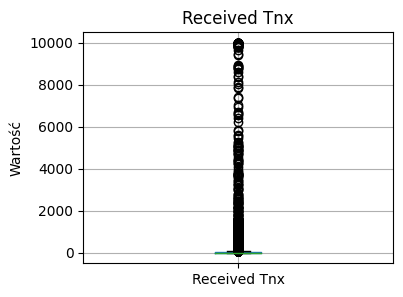

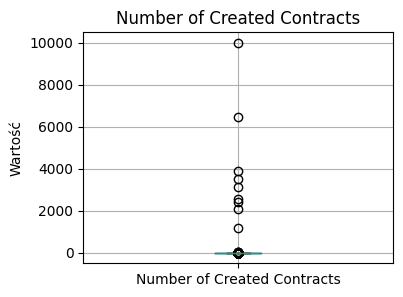

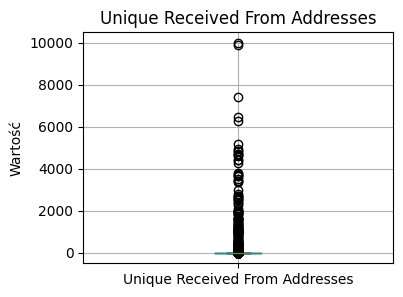

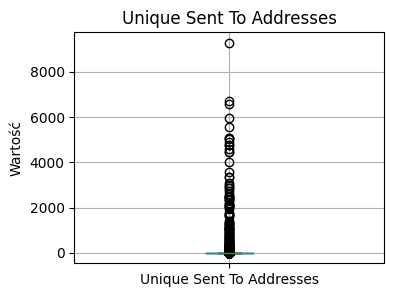

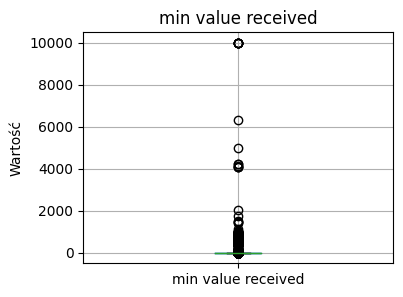

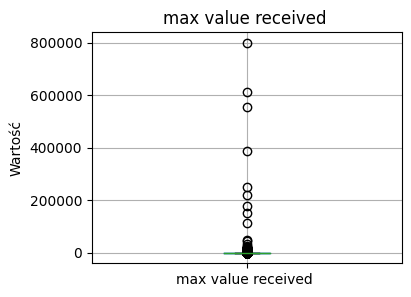

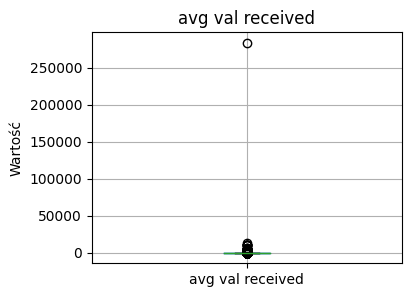

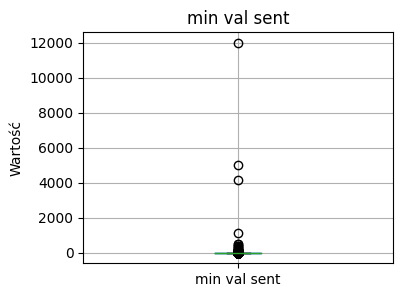

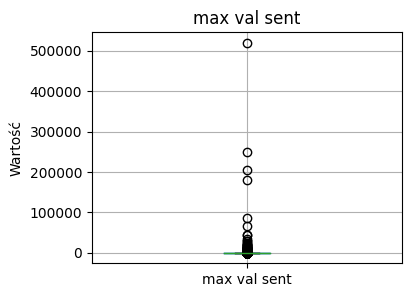

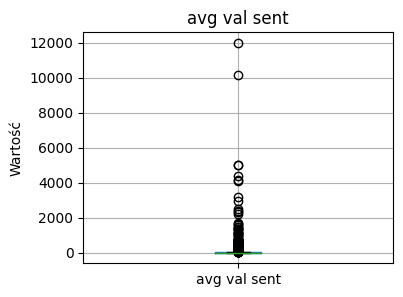

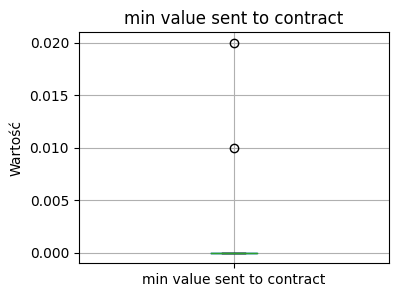

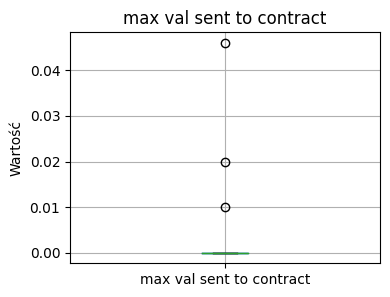

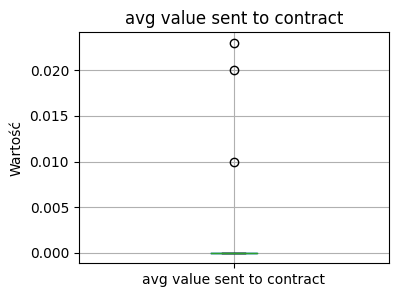

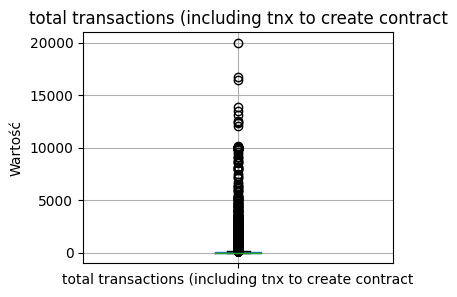

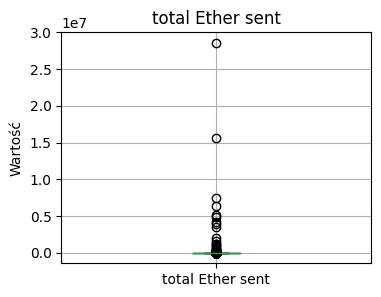

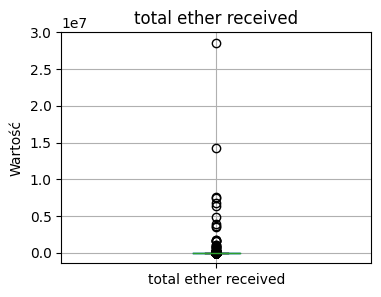

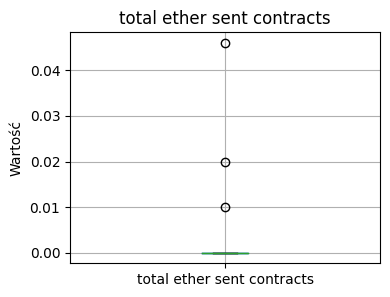

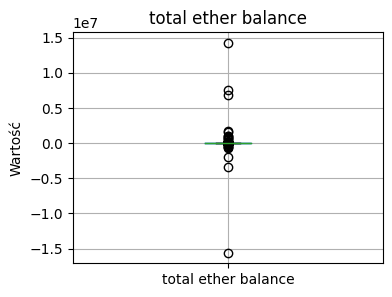

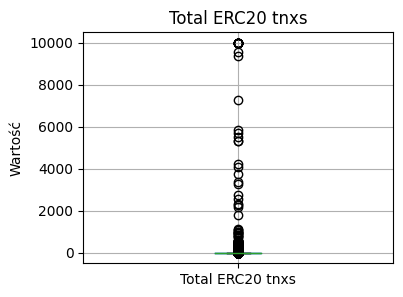

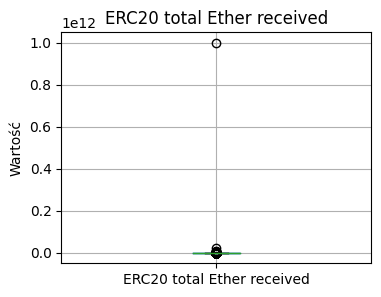

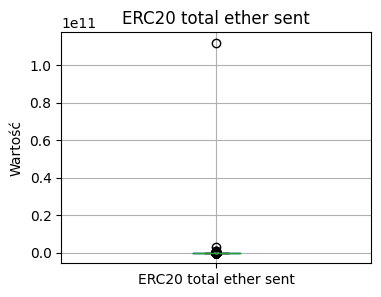

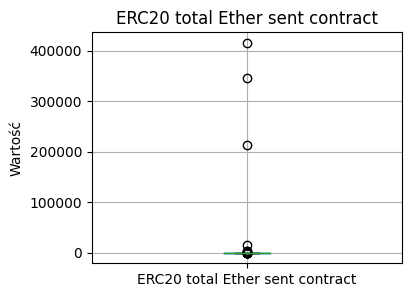

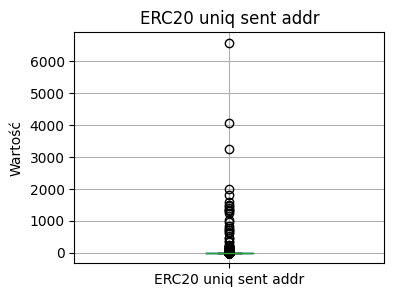

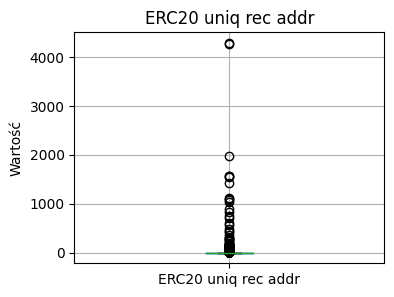

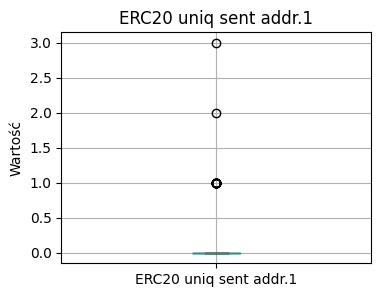

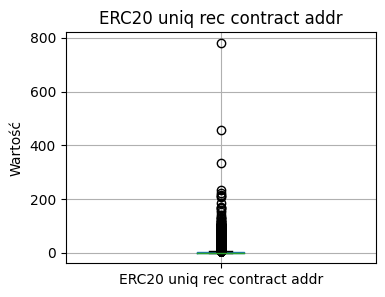

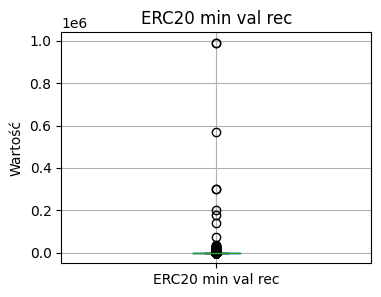

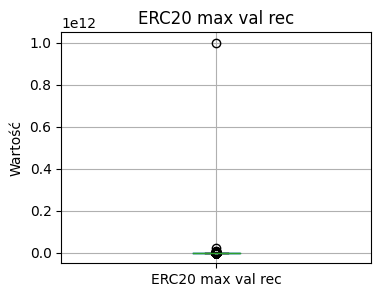

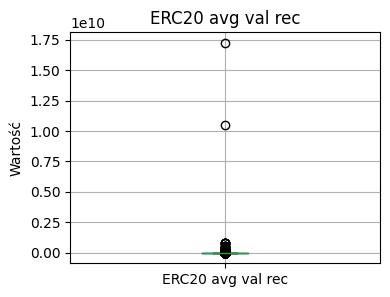

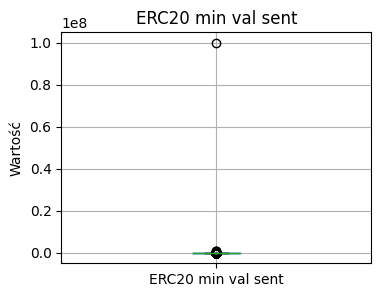

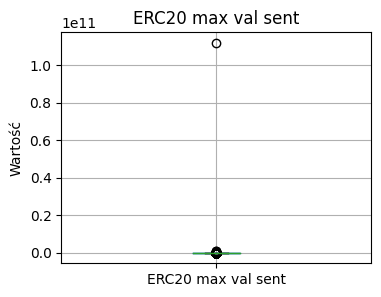

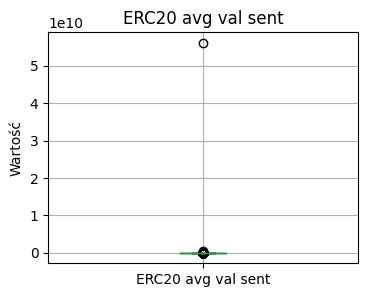

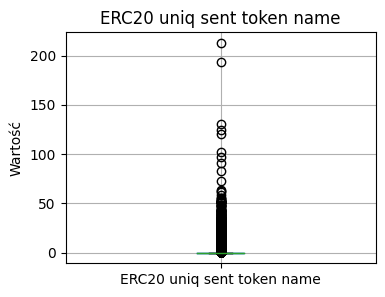

In [42]:
# Stworzenie wykresu pudełkowego dla każdej zmiennej numerycznej w celu zlokalizowania
# wartości odstających
for column in columns_numeric:
        plt.figure(figsize=(4, 3))
        dane2_cleaned.boxplot(column=column)
        plt.title(f'{column}')
        plt.ylabel('Wartość')
        plt.xlabel('')
        plt.show()

####  Na podstawie powyższych wykresów ustalam ile wartości należy usunąć (indywidualnie dla każdej zmiennej):

In [ ]:
# Sortowanie i usuwanie max wartości
dane2_cleaned['Avg min between sent tnx'] = dane2_cleaned['Avg min between sent tnx'].sort_values().iloc[:-10]
dane2_cleaned['Avg min between received tnx'] = dane2_cleaned['Avg min between received tnx'].sort_values().iloc[:-10]
dane2_cleaned['Unique Received From Addresses'] = dane2_cleaned['Unique Received From Addresses'].sort_values().iloc[:-5]
dane2_cleaned['Unique Sent To Addresses'] = dane2_cleaned['Unique Sent To Addresses'].sort_values().iloc[:-5]
dane2_cleaned['min value received'] = dane2_cleaned['min value received'].sort_values().iloc[:-10]
dane2_cleaned['avg val sent'] = dane2_cleaned['avg val sent'].sort_values().iloc[:-6]
dane2_cleaned['total transactions (including tnx to create contract'] = dane2_cleaned['total transactions (including tnx to create contract'].sort_values().iloc[:-15]
dane2_cleaned['total Ether sent'] = dane2_cleaned['total Ether sent'].sort_values().iloc[:-4]
dane2_cleaned['max value received '] = dane2_cleaned['max value received '].sort_values().iloc[:-10]
dane2_cleaned['avg val received'] = dane2_cleaned['avg val received'].sort_values().iloc[:-1]
dane2_cleaned['min val sent'] = dane2_cleaned['min val sent'].sort_values().iloc[:-4]
dane2_cleaned['max val sent'] = dane2_cleaned['max val sent'].sort_values().iloc[:-7]
dane2_cleaned['total ether received'] = dane2_cleaned['total ether received'].sort_values().iloc[:-2]
dane2_cleaned['total ether balance'] = dane2_cleaned['total ether balance'].sort_values().iloc[:-3]
dane2_cleaned['Total ERC20 tnxs'] = dane2_cleaned['Total ERC20 tnxs'].sort_values().iloc[:-30]
dane2_cleaned['ERC20 total Ether received'] = dane2_cleaned['ERC20 total Ether received'].sort_values().iloc[:-1]
dane2_cleaned['ERC20 total ether sent'] = dane2_cleaned['ERC20 total ether sent'].sort_values().iloc[:-1]
dane2_cleaned['ERC20 total Ether sent contract'] = dane2_cleaned['ERC20 total Ether sent contract'].sort_values().iloc[:-3]
dane2_cleaned['ERC20 uniq sent addr'] = dane2_cleaned['ERC20 uniq sent addr'].sort_values().iloc[:-3]
dane2_cleaned['ERC20 uniq rec addr'] = dane2_cleaned['ERC20 uniq rec addr'].sort_values().iloc[:-10]
dane2_cleaned['ERC20 uniq rec contract addr'] = dane2_cleaned['ERC20 uniq rec contract addr'].sort_values().iloc[:-3]
dane2_cleaned['ERC20 min val rec'] = dane2_cleaned['ERC20 min val rec'].sort_values().iloc[:-5]
dane2_cleaned['ERC20 max val rec'] = dane2_cleaned['ERC20 max val rec'].sort_values().iloc[:-1]
dane2_cleaned['ERC20 avg val rec'] = dane2_cleaned['ERC20 avg val rec'].sort_values().iloc[:-2]
dane2_cleaned['ERC20 min val sent'] = dane2_cleaned['ERC20 min val sent'].sort_values().iloc[:-1]
dane2_cleaned['ERC20 max val sent'] = dane2_cleaned['ERC20 max val sent'].sort_values().iloc[:-1]
dane2_cleaned['ERC20 avg val sent'] = dane2_cleaned['ERC20 avg val sent'].sort_values().iloc[:-1]
dane2_cleaned['ERC20 uniq sent token name'] = dane2_cleaned['ERC20 uniq sent token name'].sort_values().iloc[:-10]


In [59]:
dane2_cleaned.shape

(9012, 59)

In [58]:
dane_bez_odstajacych = dane2_cleaned.dropna()
dane_bez_odstajacych.shape

(8899, 59)

#### Łącznie usunięto 113 wartości odstających

## 2.6 Normalizacja zmiennych numerycznych

In [60]:
scaler = MinMaxScaler()

In [ ]:
for i in dane_bez_odstajacych[columns_numeric]:
  dane_bez_odstajacych[i] = scaler.fit_transform(dane_bez_odstajacych[[i]])

In [73]:
dane_norm = dane_bez_odstajacych

In [74]:
dane_norm.shape

(8899, 59)

## 2.7 Ranking korelacji cech

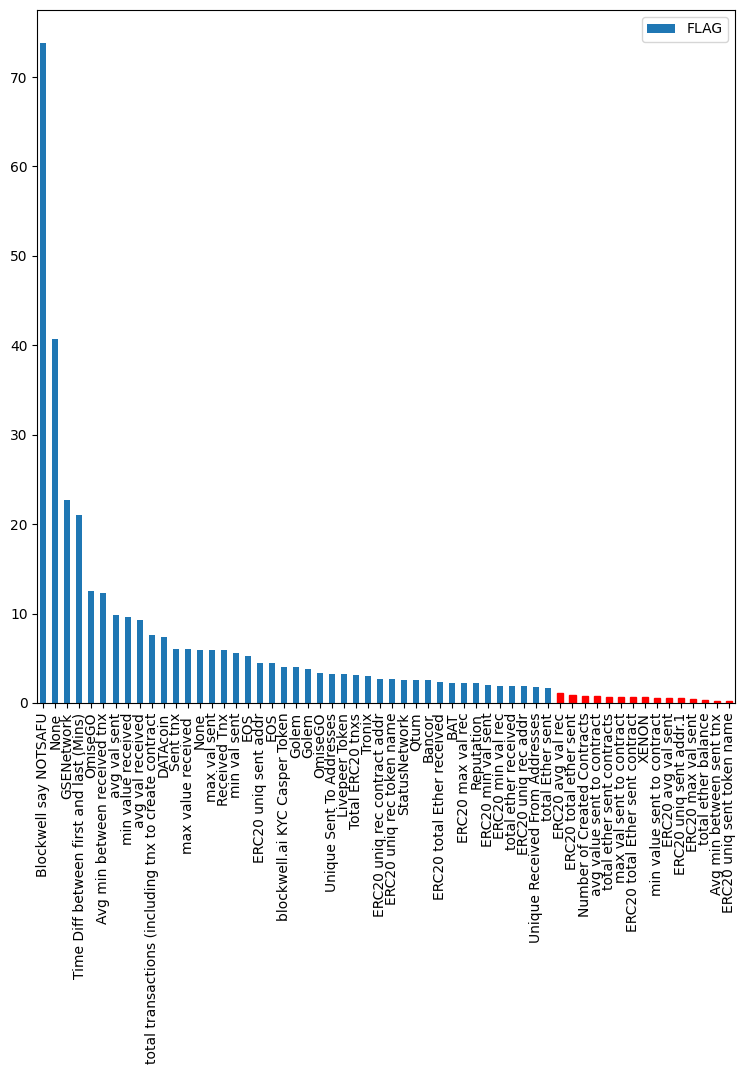

In [78]:
# Wykres
wykres = pd.DataFrame(abs(dane_norm.corr()['FLAG'].drop('FLAG')*100).sort_values(ascending=False)).plot.bar(figsize = (9,9))

for bar in wykres.patches[-15:]:
    bar.set_color('red')

plt.show()

#### Postanowiłem usunąć 15 najmniej skorelowanych cech (na powyższym wykresie słupkowym są one zaznaczone kolorem czerwonym)

In [79]:
# Usunięcie kolumn:

dane_norm2 = dane_norm.drop(["ERC20 uniq sent token name", "Avg min between sent tnx",
                             "total ether balance", "ERC20 max val sent",
                             "ERC20 uniq sent addr.1", "ERC20 avg val sent",
                             "min value sent to contract", "XENON",
                             "ERC20 total Ether sent contract", "max val sent to contract",
                             "total ether sent contracts", "avg value sent to contract",
                             "Number of Created Contracts", "ERC20 total ether sent",
                             "ERC20 avg val rec"], axis=1)
dane_norm2.shape

(8899, 44)

# 3. PCA

#### Zapytać o modele: knn, regresja logistyczna oraz ...
#### Czy ważniejsza bedzie precision, czy recall? - recall